# RFM Analysis

## 1. Import the required Packages

In [1]:
#Import the necessary packages 
import pandas as pd
import datetime as dt
import calendar
import numpy as np
pd.options.display.float_format = '{:.2f}'.format
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
plt.style.use('ggplot')

In [2]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

## 2. Read the data and perform cleaning

In [3]:
#Read the Retail dataset
retail = pd.read_csv("D:\\REVA\\Reva Assignments\\OnlineRetail2Sample.csv")

In [4]:
#Convert the Date of Purchase to datetime format
retail['DoP'] = pd.to_datetime(retail['DoP'])

In [5]:
#Remove the StockCodes which are less than 5 in length
retail = retail[retail['StockCode'].apply(lambda x: len(x) >= 5)]
retail.head(10)

,InvoiceNo,StockCode,Quantity,DoP,UnitPrice,CustomerID,Country
0,536365,85123A,6,2010-12-01,2.55,17850,United Kingdom
1,536365,71053,6,2010-12-01,3.39,17850,United Kingdom
2,536365,84406B,8,2010-12-01,2.75,17850,United Kingdom
3,536365,84029G,6,2010-12-01,3.39,17850,United Kingdom
4,536365,84029E,6,2010-12-01,3.39,17850,United Kingdom
5,536365,22752,2,2010-12-01,7.65,17850,United Kingdom
6,536365,21730,6,2010-12-01,4.25,17850,United Kingdom
7,536366,22633,6,2010-12-01,1.85,17850,United Kingdom
8,536366,22632,6,2010-12-01,1.85,17850,United Kingdom
9,536367,84879,32,2010-12-01,1.69,13047,United Kingdom


In [6]:
retail.StockCode.shape

(404921,)

In [7]:
Stock_Array = []
for item in retail['StockCode']:
    if(len(item) == 6):
        Stock_Array.append(item[:-1])
    else:
        Stock_Array.append(item)

In [8]:
retail['StockCode'] = Stock_Array

In [9]:
#Remove all rows with negative values for the attribute - Quantity
retail = retail[(retail >= 0).all(1)]

In [10]:
#Check the shape of retailm dataset after removing the negative Quantity rows.
retail.shape

(396382, 7)

In [11]:
#Calculate the total amount for each transaction
retail['Amount'] = retail.Quantity * retail.UnitPrice

In [12]:
#Calculate the unique Time_ID for each transaction date.
retail['Time_ID'] = retail['DoP'].map(lambda x: 1000*x.year + x.month)

In [13]:
#Calculate the max date of each month
from pandas.tseries.offsets import MonthEnd

retail['DoP_MaxMonth'] = pd.to_datetime(retail['DoP'], format="%Y%m") + MonthEnd(1)

In [14]:
retail.head()

,InvoiceNo,StockCode,Quantity,DoP,UnitPrice,CustomerID,Country,Amount,Time_ID,DoP_MaxMonth
0,536365,85123,6,2010-12-01,2.55,17850,United Kingdom,15.30,2010012,2010-12-31
1,536365,71053,6,2010-12-01,3.39,17850,United Kingdom,20.34,2010012,2010-12-31
2,536365,84406,8,2010-12-01,2.75,17850,United Kingdom,22.00,2010012,2010-12-31
3,536365,84029,6,2010-12-01,3.39,17850,United Kingdom,20.34,2010012,2010-12-31
4,536365,84029,6,2010-12-01,3.39,17850,United Kingdom,20.34,2010012,2010-12-31


In [15]:
#Calculate the monthly recency for each month
retail['Mon_Recency'] = retail['DoP_MaxMonth'] - retail['DoP']

In [16]:
#retail.to_csv("d:\\Retail.csv", encoding='utf-8')

In [17]:
retail.tail()

,InvoiceNo,StockCode,Quantity,DoP,UnitPrice,CustomerID,Country,Amount,Time_ID,DoP_MaxMonth,Mon_Recency
406824,581587,22613,12,2011-12-09,0.85,12680,France,10.20,2011012,2011-12-31,22 days
406825,581587,22899,6,2011-12-09,2.10,12680,France,12.60,2011012,2011-12-31,22 days
406826,581587,23254,4,2011-12-09,4.15,12680,France,16.60,2011012,2011-12-31,22 days
406827,581587,23255,4,2011-12-09,4.15,12680,France,16.60,2011012,2011-12-31,22 days
406828,581587,22138,3,2011-12-09,4.95,12680,France,14.85,2011012,2011-12-31,22 days


In [18]:
#Aggregate the records based on Time_ID,InvoiceNo and calculate the monthly recency, frequency and monetary value
RFM_MonAggr = retail.groupby(['Time_ID', 'CustomerID']).agg({'Mon_Recency': lambda x: x.min(), # Monthly Recency
                                        'InvoiceNo': lambda x:x.nunique(),      # Frequency
                                        'Amount': lambda x: x.sum()}) # Monetary Value

RFM_MonAggr.rename(columns={'Mon_Recency':'M_Recency',
                        'InvoiceNo': 'M_Frequency', 
                        'Amount': 'M_Monetary'}, inplace=True)

In [19]:
RFM_MonAggr.head()

M_Recency  M_Frequency  M_Monetary
Time_ID CustomerID                                   
2010012 12347        24 days            1      711.79
        12348        15 days            1      652.80
        12370        14 days            2     1748.02
        12377        11 days            1     1001.52
        12383         9 days            1      555.72

In [20]:
RFM_MonAggr.columns

Index(['M_Recency', 'M_Frequency', 'M_Monetary'], dtype='object')

In [21]:
RFM_MonAggr.unstack()

M_Recency                                                        \
CustomerID     12346   12347   12348  12349   12350   12352   12353  12354   
Time_ID                                                                      
2010012          NaT 24 days 15 days    NaT     NaT     NaT     NaT    NaT   
2011001      13 days  5 days  6 days    NaT     NaT     NaT     NaT    NaT   
2011002          NaT     NaT     NaT    NaT 26 days 12 days     NaT    NaT   
2011003          NaT     NaT     NaT    NaT     NaT  9 days     NaT    NaT   
2011004          NaT 23 days 25 days    NaT     NaT     NaT     NaT 9 days   
2011005          NaT     NaT     NaT    NaT     NaT     NaT 12 days    NaT   
2011006          NaT 21 days     NaT    NaT     NaT     NaT     NaT    NaT   
2011007          NaT     NaT     NaT    NaT     NaT     NaT     NaT    NaT   
2011008          NaT 29 days     NaT    NaT     NaT     NaT     NaT    NaT   
2011009          NaT     NaT  5 days    NaT     NaT  2 days     NaT    NaT   
2011010          NaT 30 days     NaT    NaT     NaT     NaT     NaT    NaT   
2011011          NaT     NaT     NaT 9 days     NaT 27 days     NaT    NaT   
2011012          NaT 24 days     NaT    NaT     NaT     NaT     NaT    NaT   

                             ...   M_Monetary                              \
CustomerID   12355   12356   ...        18273  18274  18276  18277  18278   
Time_ID                      ...                                            
2010012        NaT     NaT   ...          nan    nan    nan    nan    nan   
2011001        NaT 13 days   ...          nan    nan    nan    nan    nan   
2011002        NaT     NaT   ...          nan    nan    nan    nan    nan   
2011003        NaT     NaT   ...        51.00    nan    nan    nan    nan   
2011004        NaT 22 days   ...          nan    nan    nan    nan    nan   
2011005    22 days     NaT   ...          nan    nan    nan    nan    nan   
2011006        NaT     NaT   ...          nan    nan    nan    nan    nan   
2011007        NaT     NaT   ...          nan    nan    nan    nan    nan   
2011008        NaT     NaT   ...          nan    nan    nan    nan    nan   
2011009        NaT     NaT   ...       102.00    nan    nan    nan 173.90   
2011010        NaT     NaT   ...          nan    nan 335.86 110.38    nan   
2011011        NaT 13 days   ...          nan 175.92    nan    nan    nan   
2011012        NaT     NaT   ...        51.00    nan    nan    nan    nan   

                                               
CustomerID  18280 18281  18282  18283   18287  
Time_ID                                        
2010012       nan   nan    nan    nan     nan  
2011001       nan   nan    nan 215.00     nan  
2011002       nan   nan    nan 102.90     nan  
2011003    180.60   nan    nan    nan     nan  
2011004       nan   nan    nan 115.73     nan  
2011005       nan   nan    nan  99.47  765.28  
2011006       nan 80.82    nan 307.53     nan  
2011007       nan   nan    nan 143.19     nan  
2011008       nan   nan 100.21    nan     nan  
2011009       nan   nan    nan 130.90     nan  
2011010       nan   nan    nan 114.65 1072.00  
2011011       nan   nan    nan 651.56     nan  
2011012       nan   nan  77.84 208.00     nan  

[13 rows x 13008 columns]

# Customer Base Analysis

In [22]:
retail.head()

,InvoiceNo,StockCode,Quantity,DoP,UnitPrice,CustomerID,Country,Amount,Time_ID,DoP_MaxMonth,Mon_Recency
0,536365,85123,6,2010-12-01,2.55,17850,United Kingdom,15.30,2010012,2010-12-31,30 days
1,536365,71053,6,2010-12-01,3.39,17850,United Kingdom,20.34,2010012,2010-12-31,30 days
2,536365,84406,8,2010-12-01,2.75,17850,United Kingdom,22.00,2010012,2010-12-31,30 days
3,536365,84029,6,2010-12-01,3.39,17850,United Kingdom,20.34,2010012,2010-12-31,30 days
4,536365,84029,6,2010-12-01,3.39,17850,United Kingdom,20.34,2010012,2010-12-31,30 days


In [23]:
#Customer size Analysis on Snapshot data
Group_By_CustSize = pd.DataFrame(retail.groupby('Country')['CustomerID'].size())
#Group_By_Country.sort_values(ascending=False,by='Country')
Group_By_CustSize = Group_By_CustSize.reset_index()
Group_By_CustSize.sort_values(ascending=False,by='CustomerID')
Group_By_CustSize['CustSize_Percent'] = round((Group_By_CustSize.CustomerID/Group_By_CustSize.CustomerID.sum()) * 100,2)
Group_By_CustSize.sort_values(ascending=False,by='CustSize_Percent')

,Country,CustomerID
35,United Kingdom,354017
14,Germany,8659
13,France,8034
10,EIRE,7138
30,Spain,2423
23,Netherlands,2326
3,Belgium,1935
32,Switzerland,1811
26,Portugal,1425
0,Australia,1184


,Country,CustomerID,CustSize_Percent
35,United Kingdom,354017,89.31
14,Germany,8659,2.18
13,France,8034,2.03
10,EIRE,7138,1.80
30,Spain,2423,0.61
23,Netherlands,2326,0.59
3,Belgium,1935,0.49
32,Switzerland,1811,0.46
26,Portugal,1425,0.36
0,Australia,1184,0.30


In [24]:
#Customer revenue Analysis on snapshot data
Group_By_CustRevenue = pd.DataFrame(retail.groupby(['Country'])['Amount'].sum())
Group_By_CustRevenue = Group_By_CustRevenue.reset_index()
Group_By_CustRevenue.sort_values(by='Amount',ascending=False)
Group_By_CustRevenue['CustRevenue_Percent'] = round((Group_By_CustRevenue.Amount/Group_By_CustRevenue.Amount.sum()) * 100,2)
Group_By_CustRevenue.sort_values(ascending=False,by='CustRevenue_Percent')

,Country,Amount
35,United Kingdom,7266027.23
23,Netherlands,283889.34
10,EIRE,257296.56
14,Germany,205569.89
13,France,183891.68
0,Australia,138171.31
30,Spain,55725.11
32,Switzerland,52441.95
19,Japan,37416.37
3,Belgium,36927.34


,Country,Amount,CustRevenue_Percent
35,United Kingdom,7266027.23,82.93
23,Netherlands,283889.34,3.24
10,EIRE,257296.56,2.94
14,Germany,205569.89,2.35
13,France,183891.68,2.10
0,Australia,138171.31,1.58
30,Spain,55725.11,0.64
32,Switzerland,52441.95,0.60
19,Japan,37416.37,0.43
3,Belgium,36927.34,0.42


# Top 10 and Bottom 10 products with respect to Revenue

StockCode
23843   168469.60
22423   142592.95
85099   139540.02
85123   100603.50
23166    81416.73
47566    79289.58
84997    57628.84
84879    56580.34
23084    51346.20
22502    47366.20
Name: Amount, dtype: float64

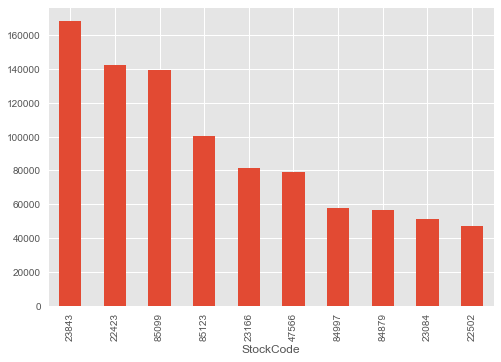

In [25]:
#Top revenue generating products
Products_by_Revenue = retail.groupby(by='StockCode')['Amount'].sum().sort_values(ascending=False)
Top_10 = Products_by_Revenue.head(10)
Top_10
Top_10.plot(kind="bar")

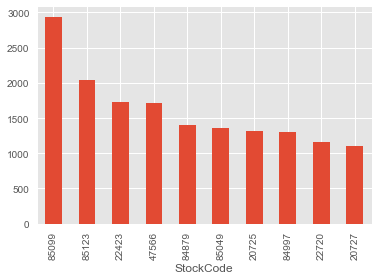

In [296]:
Products_by_count = retail.groupby(by='StockCode')['StockCode'].count()
Products_by_count.sort_values(ascending=False).head(10).plot(kind='bar')


In [26]:
#Bottom 10 products with respect to revenue
Products_by_Revenue.tail(10)

StockCode
22034   1.26
90071   1.25
90128   1.25
84743   1.25
37461   1.25
84990   1.10
90104   0.85
90084   0.85
21268   0.84
84227   0.42
Name: Amount, dtype: float64

# Best and Last customers with respect to Revenue

In [27]:
#Top revenue generating customers
Customers_by_Revenue = retail.groupby(by='CustomerID')['Amount'].sum().sort_values(ascending=False)
Customers_by_Revenue.head(10)
# Month_Wise_Monetary.plot(kind="bar")

CustomerID
14646   279138.02
18102   259657.30
17450   194550.79
16446   168472.50
14911   136275.72
12415   124564.53
14156   116729.63
17511    91062.38
12346    77183.60
16029    72882.09
Name: Amount, dtype: float64

In [28]:
#Bottom 10 customers
Customers_by_Revenue.tail(10)

CustomerID
16093   17.00
17763   15.00
13307   15.00
15823   15.00
16878   13.30
17956   12.75
14792    6.20
16454    5.90
16738    3.75
13256    0.00
Name: Amount, dtype: float64

# Month on Month Trend in Revenue

In [29]:
#Track the total sales month on month
Month_Wise_Monetary = retail.groupby(['Time_ID']).agg({'Amount': lambda x: x.sum()}) # Monetary Value

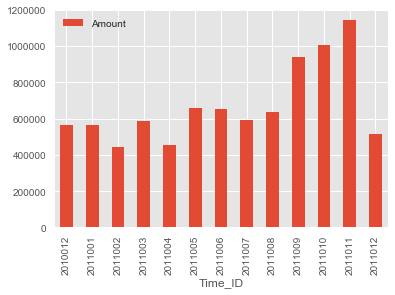

In [30]:
%matplotlib inline
Month_Wise_Monetary.plot(kind="bar")

In [31]:
RFM_MonAggr = pd.DataFrame(RFM_MonAggr.reset_index())
RFM_MonAggr.head()

,Time_ID,CustomerID,M_Recency,M_Frequency,M_Monetary
0,2010012,12347,24 days,1,711.79
1,2010012,12348,15 days,1,652.80
2,2010012,12370,14 days,2,1748.02
3,2010012,12377,11 days,1,1001.52
4,2010012,12383,9 days,1,555.72


In [32]:
#RFM_MonAggr['M_Recency'] = RFM_MonAggr['M_Recency'] / np.timedelta64(1, 'D')
RFM_MonAggr.head()

,Time_ID,CustomerID,M_Recency,M_Frequency,M_Monetary
0,2010012,12347,24 days,1,711.79
1,2010012,12348,15 days,1,652.80
2,2010012,12370,14 days,2,1748.02
3,2010012,12377,11 days,1,1001.52
4,2010012,12383,9 days,1,555.72


In [33]:
RFM_MonAggr['M_Recency'] = (RFM_MonAggr.M_Recency / np.timedelta64(1, 'D')).astype(int)

# Create RFM scores for all monthly aggregate tables

In [34]:
#RFM_201012 = RFM_MonAggr.loc[RFM_MonAggr.Time_ID == 2010012, 'Time_ID
RFM_201012 = RFM_MonAggr[RFM_MonAggr['Time_ID'] == 2010012]
RFM_201101 = RFM_MonAggr[RFM_MonAggr['Time_ID'] == 2011001]
RFM_201102 = RFM_MonAggr[RFM_MonAggr['Time_ID'] == 2011002]
RFM_201103 = RFM_MonAggr[RFM_MonAggr['Time_ID'] == 2011003]
RFM_201104 = RFM_MonAggr[RFM_MonAggr['Time_ID'] == 2011004]
RFM_201105 = RFM_MonAggr[RFM_MonAggr['Time_ID'] == 2011005]
RFM_201106 = RFM_MonAggr[RFM_MonAggr['Time_ID'] == 2011006]
RFM_201107 = RFM_MonAggr[RFM_MonAggr['Time_ID'] == 2011007]
RFM_201108 = RFM_MonAggr[RFM_MonAggr['Time_ID'] == 2011008]
RFM_201109 = RFM_MonAggr[RFM_MonAggr['Time_ID'] == 2011009]
RFM_201110 = RFM_MonAggr[RFM_MonAggr['Time_ID'] == 2011010]
RFM_201111 = RFM_MonAggr[RFM_MonAggr['Time_ID'] == 2011011]
RFM_201112 = RFM_MonAggr[RFM_MonAggr['Time_ID'] == 2011012]

In [35]:
RFM_201012.head()
RFM_201101.head()
RFM_201102.head()

,Time_ID,CustomerID,M_Recency,M_Frequency,M_Monetary
0,2010012,12347,24,1,711.79
1,2010012,12348,15,1,652.80
2,2010012,12370,14,2,1748.02
3,2010012,12377,11,1,1001.52
4,2010012,12383,9,1,555.72


,Time_ID,CustomerID,M_Recency,M_Frequency,M_Monetary
885,2011001,12346,13,1,77183.60
886,2011001,12347,5,1,475.39
887,2011001,12348,6,1,187.44
888,2011001,12356,13,1,1947.62
889,2011001,12359,19,1,547.50


,Time_ID,CustomerID,M_Recency,M_Frequency,M_Monetary
1624,2011002,12350,26,1,294.40
1625,2011002,12352,12,1,296.50
1626,2011002,12359,21,1,1838.91
1627,2011002,12361,3,1,174.90
1628,2011002,12362,11,1,434.10


In [36]:
#pd.crosstab(RFM_201012.CustomerID, RFM_201012.M_Recency)
#RFM_First_3Months = pd.concat([RFM_201012,RFM_201101,RFM_201102], axis=0)
#RFM_First_3Months.head()

In [37]:
RFM_201012.set_index('Time_ID')
RFM_201101.set_index('Time_ID')
RFM_201102.set_index('Time_ID')
RFM_201103.set_index('Time_ID')
RFM_201104.set_index('Time_ID')
RFM_201105.set_index('Time_ID')
RFM_201106.set_index('Time_ID')
RFM_201107.set_index('Time_ID')
RFM_201108.set_index('Time_ID')
RFM_201109.set_index('Time_ID')
RFM_201110.set_index('Time_ID')
RFM_201111.set_index('Time_ID')
RFM_201112.set_index('Time_ID')

,CustomerID,M_Recency,M_Frequency,M_Monetary
Time_ID,,,,
2010012,12347,24,1,711.79
2010012,12348,15,1,652.80
2010012,12370,14,2,1748.02
2010012,12377,11,1,1001.52
2010012,12383,9,1,555.72
2010012,12386,23,1,258.90
2010012,12395,14,2,589.92
2010012,12417,14,1,261.34
2010012,12423,10,1,192.93


,CustomerID,M_Recency,M_Frequency,M_Monetary
Time_ID,,,,
2011001,12346,13,1,77183.60
2011001,12347,5,1,475.39
2011001,12348,6,1,187.44
2011001,12356,13,1,1947.62
2011001,12359,19,1,547.50
2011001,12377,3,1,546.60
2011001,12383,19,1,591.16
2011001,12386,25,1,143.00
2011001,12388,14,1,431.30


,CustomerID,M_Recency,M_Frequency,M_Monetary
Time_ID,,,,
2011002,12350,26,1,294.40
2011002,12352,12,1,296.50
2011002,12359,21,1,1838.91
2011002,12361,3,1,174.90
2011002,12362,11,1,434.10
2011002,12365,7,1,320.69
2011002,12372,12,1,363.22
2011002,12373,27,1,324.60
2011002,12388,21,1,124.05


,CustomerID,M_Recency,M_Frequency,M_Monetary
Time_ID,,,,
2011003,12352,9,3,345.01
2011003,12370,21,1,938.39
2011003,12383,17,1,285.07
2011003,12388,22,1,210.90
2011003,12395,8,1,281.50
2011003,12399,8,1,273.05
2011003,12407,11,1,211.30
2011003,12408,7,2,762.59
2011003,12415,28,1,16726.84


,CustomerID,M_Recency,M_Frequency,M_Monetary
Time_ID,,,,
2011004,12347,23,1,636.25
2011004,12348,25,1,327.00
2011004,12354,9,1,1079.40
2011004,12356,22,1,481.46
2011004,12362,2,1,450.24
2011004,12363,19,1,299.10
2011004,12383,15,1,127.16
2011004,12393,22,1,421.60
2011004,12407,12,1,239.66


,CustomerID,M_Recency,M_Frequency,M_Monetary
Time_ID,,,,
2011005,12353,12,1,89.00
2011005,12355,22,1,459.40
2011005,12360,8,1,923.58
2011005,12372,20,1,479.70
2011005,12394,25,1,351.08
2011005,12395,19,2,301.79
2011005,12399,21,1,450.90
2011005,12414,25,1,125.85
2011005,12415,11,2,12691.16


,CustomerID,M_Recency,M_Frequency,M_Monetary
Time_ID,,,,
2011006,12347,21,1,382.52
2011006,12359,27,1,1109.32
2011006,12379,8,1,414.84
2011006,12380,23,1,562.55
2011006,12383,22,1,69.45
2011006,12395,31,1,148.90
2011006,12399,21,1,115.08
2011006,12406,21,1,1621.25
2011006,12408,13,1,594.18


,CustomerID,M_Recency,M_Frequency,M_Monetary
Time_ID,,,,
2011007,12358,19,1,404.86
2011007,12362,24,1,273.76
2011007,12388,17,1,902.09
2011007,12397,4,1,1109.81
2011007,12405,17,1,1390.39
2011007,12407,3,2,791.40
2011007,12412,6,1,358.24
2011007,12415,12,3,2955.01
2011007,12428,26,1,472.44


,CustomerID,M_Recency,M_Frequency,M_Monetary
Time_ID,,,,
2011008,12347,29,1,584.91
2011008,12360,12,1,454.70
2011008,12362,20,1,424.25
2011008,12363,9,1,252.90
2011008,12364,12,1,578.92
2011008,12378,29,1,4008.62
2011008,12381,19,1,1028.74
2011008,12384,21,1,212.69
2011008,12395,12,1,135.95


,CustomerID,M_Recency,M_Frequency,M_Monetary
Time_ID,,,,
2011009,12348,5,1,270.00
2011009,12352,2,2,512.50
2011009,12362,2,1,769.99
2011009,12364,8,1,64.80
2011009,12372,1,1,353.12
2011009,12375,28,1,190.30
2011009,12379,11,1,362.40
2011009,12380,8,1,572.01
2011009,12388,5,1,825.92


,CustomerID,M_Recency,M_Frequency,M_Monetary
Time_ID,,,,
2011010,12347,30,1,1294.32
2011010,12359,18,1,2876.85
2011010,12360,13,1,923.78
2011010,12362,3,3,1491.91
2011010,12364,1,1,269.06
2011010,12370,12,1,739.28
2011010,12371,20,1,1527.96
2011010,12380,17,1,396.86
2011010,12394,24,1,729.40


,CustomerID,M_Recency,M_Frequency,M_Monetary
Time_ID,,,,
2011011,12349,9,1,1457.55
2011011,12352,27,1,231.73
2011011,12356,13,1,58.35
2011011,12357,24,1,6207.67
2011011,12362,26,1,417.94
2011011,12374,16,1,622.93
2011011,12375,1,1,187.20
2011011,12380,12,1,896.39
2011011,12381,24,1,339.06


,CustomerID,M_Recency,M_Frequency,M_Monetary
Time_ID,,,,
2011012,12347,24,1,224.82
2011012,12358,23,1,523.20
2011012,12362,25,1,475.04
2011012,12364,29,1,295.32
2011012,12367,26,1,150.90
2011012,12381,26,1,107.01
2011012,12417,25,1,324.73
2011012,12423,22,1,193.64
2011012,12433,22,2,2638.69


In [38]:
Quantiles_201012=RFM_201012.quantile(q=[0.25,0.5,0.75])
Quantiles_201101=RFM_201101.quantile(q=[0.25,0.5,0.75])
Quantiles_201102=RFM_201102.quantile(q=[0.25,0.5,0.75])
Quantiles_201103=RFM_201102.quantile(q=[0.25,0.5,0.75])
Quantiles_201104=RFM_201102.quantile(q=[0.25,0.5,0.75])
Quantiles_201105=RFM_201102.quantile(q=[0.25,0.5,0.75])
Quantiles_201106=RFM_201102.quantile(q=[0.25,0.5,0.75])
Quantiles_201107=RFM_201102.quantile(q=[0.25,0.5,0.75])
Quantiles_201108=RFM_201102.quantile(q=[0.25,0.5,0.75])
Quantiles_201109=RFM_201102.quantile(q=[0.25,0.5,0.75])
Quantiles_201110=RFM_201102.quantile(q=[0.25,0.5,0.75])
Quantiles_201111=RFM_201102.quantile(q=[0.25,0.5,0.75])
Quantiles_201112=RFM_201102.quantile(q=[0.25,0.5,0.75])

In [39]:
Quantiles_201012
Quantiles_201101
Quantiles_201102

,Time_ID,CustomerID,M_Recency,M_Frequency,M_Monetary
0.25,2010012.00,14051.00,15.00,1.00,196.40
0.50,2010012.00,15545.00,21.00,1.00,322.30
0.75,2010012.00,17001.00,25.00,2.00,583.20


,Time_ID,CustomerID,M_Recency,M_Frequency,M_Monetary
0.25,2011001.00,13570.50,6.00,1.00,199.46
0.50,2011001.00,15034.00,13.00,1.00,334.26
0.75,2011001.00,16740.50,21.00,1.00,595.88


,Time_ID,CustomerID,M_Recency,M_Frequency,M_Monetary
0.25,2011002.00,13751.00,6.00,1.00,184.18
0.50,2011002.00,15199.00,12.00,1.00,326.36
0.75,2011002.00,16842.00,21.00,1.00,574.02


In [40]:
Quantiles_dict_201012 = Quantiles_201012.to_dict()
Quantiles_dict_201101 = Quantiles_201101.to_dict()
Quantiles_dict_201102 = Quantiles_201102.to_dict()
Quantiles_dict_201103 = Quantiles_201102.to_dict()
Quantiles_dict_201104 = Quantiles_201102.to_dict()
Quantiles_dict_201105 = Quantiles_201102.to_dict()
Quantiles_dict_201106 = Quantiles_201102.to_dict()
Quantiles_dict_201107 = Quantiles_201102.to_dict()
Quantiles_dict_201108 = Quantiles_201102.to_dict()
Quantiles_dict_201109 = Quantiles_201102.to_dict()
Quantiles_dict_201110 = Quantiles_201102.to_dict()
Quantiles_dict_201111 = Quantiles_201102.to_dict()
Quantiles_dict_201112 = Quantiles_201102.to_dict()

In [41]:
Quantiles_dict_201012
Quantiles_dict_201101
Quantiles_dict_201102

{'CustomerID': {0.25: 14051.0, 0.5: 15545.0, 0.75: 17001.0},
 'M_Frequency': {0.25: 1.0, 0.5: 1.0, 0.75: 2.0},
 'M_Monetary': {0.25: 196.40000000000003,
  0.5: 322.30000000000001,
  0.75: 583.20000000000005},
 'M_Recency': {0.25: 15.0, 0.5: 21.0, 0.75: 25.0},
 'Time_ID': {0.25: 2010012.0, 0.5: 2010012.0, 0.75: 2010012.0}}

{'CustomerID': {0.25: 13570.5, 0.5: 15034.0, 0.75: 16740.5},
 'M_Frequency': {0.25: 1.0, 0.5: 1.0, 0.75: 1.0},
 'M_Monetary': {0.25: 199.46499999999997,
  0.5: 334.25999999999993,
  0.75: 595.875},
 'M_Recency': {0.25: 6.0, 0.5: 13.0, 0.75: 21.0},
 'Time_ID': {0.25: 2011001.0, 0.5: 2011001.0, 0.75: 2011001.0}}

{'CustomerID': {0.25: 13751.0, 0.5: 15199.0, 0.75: 16842.0},
 'M_Frequency': {0.25: 1.0, 0.5: 1.0, 0.75: 1.0},
 'M_Monetary': {0.25: 184.17999999999998,
  0.5: 326.36000000000001,
  0.75: 574.01999999999998},
 'M_Recency': {0.25: 6.0, 0.5: 12.0, 0.75: 21.0},
 'Time_ID': {0.25: 2011002.0, 0.5: 2011002.0, 0.75: 2011002.0}}

In [42]:
def RecScore(x,p,d):
    if x <= d[p][0.25]:
        return 4
    elif x <= d[p][0.5]:
        return 3
    elif x <=d[p][0.75]:
        return 2
    else:
        return 1

In [43]:
def FreqMonScore(x,p,d):
    if x <= d[p][0.25]:
        return 1
    elif x <= d[p][0.5]:
        return 2
    elif x <= d[p][0.75]:
        return 3
    else:
        return 4

In [44]:
#Calculate individual scores for R,F and M for RFM_201012 data
RFM_201012['R_Score']= RFM_201012['M_Recency'].apply(RecScore,args=('M_Recency',Quantiles_dict_201012))
RFM_201012['F_Score']= RFM_201012['M_Frequency'].apply(FreqMonScore,args=('M_Frequency',Quantiles_dict_201012))
RFM_201012['M_Score']= RFM_201012['M_Monetary'].apply(FreqMonScore,args=('M_Monetary',Quantiles_dict_201012))

#Calculate individual scores for R,F and M for RFM_201101 data
RFM_201101['R_Score']= RFM_201101['M_Recency'].apply(RecScore,args=('M_Recency',Quantiles_dict_201101))
RFM_201101['F_Score']= RFM_201101['M_Frequency'].apply(FreqMonScore,args=('M_Frequency',Quantiles_dict_201101))
RFM_201101['M_Score']= RFM_201101['M_Monetary'].apply(FreqMonScore,args=('M_Monetary',Quantiles_dict_201101))

#Calculate individual scores for R,F and M for RFM_201102 data
RFM_201102['R_Score']= RFM_201102['M_Recency'].apply(RecScore,args=('M_Recency',Quantiles_dict_201102))
RFM_201102['F_Score']= RFM_201102['M_Frequency'].apply(FreqMonScore,args=('M_Frequency',Quantiles_dict_201102))
RFM_201102['M_Score']= RFM_201102['M_Monetary'].apply(FreqMonScore,args=('M_Monetary',Quantiles_dict_201102))

C:\Users\dell 7548\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
C:\Users\dell 7548\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\dell 7548\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the 

In [45]:
#Calculate individual scores for R,F and M for RFM_201103 data
RFM_201103['R_Score']= RFM_201103['M_Recency'].apply(RecScore,args=('M_Recency',Quantiles_dict_201103))
RFM_201103['F_Score']= RFM_201103['M_Frequency'].apply(FreqMonScore,args=('M_Frequency',Quantiles_dict_201103))
RFM_201103['M_Score']= RFM_201103['M_Monetary'].apply(FreqMonScore,args=('M_Monetary',Quantiles_dict_201103))

#Calculate individual scores for R,F and M for RFM_201104 data
RFM_201104['R_Score']= RFM_201104['M_Recency'].apply(RecScore,args=('M_Recency',Quantiles_dict_201104))
RFM_201104['F_Score']= RFM_201104['M_Frequency'].apply(FreqMonScore,args=('M_Frequency',Quantiles_dict_201104))
RFM_201104['M_Score']= RFM_201104['M_Monetary'].apply(FreqMonScore,args=('M_Monetary',Quantiles_dict_201104))

#Calculate individual scores for R,F and M for RFM_201105 data
RFM_201105['R_Score']= RFM_201105['M_Recency'].apply(RecScore,args=('M_Recency',Quantiles_dict_201105))
RFM_201105['F_Score']= RFM_201105['M_Frequency'].apply(FreqMonScore,args=('M_Frequency',Quantiles_dict_201105))
RFM_201105['M_Score']= RFM_201105['M_Monetary'].apply(FreqMonScore,args=('M_Monetary',Quantiles_dict_201105))

#Calculate individual scores for R,F and M for RFM_201106 data
RFM_201106['R_Score']= RFM_201106['M_Recency'].apply(RecScore,args=('M_Recency',Quantiles_dict_201106))
RFM_201106['F_Score']= RFM_201106['M_Frequency'].apply(FreqMonScore,args=('M_Frequency',Quantiles_dict_201106))
RFM_201106['M_Score']= RFM_201106['M_Monetary'].apply(FreqMonScore,args=('M_Monetary',Quantiles_dict_201106))

#Calculate individual scores for R,F and M for RFM_201107 data
RFM_201107['R_Score']= RFM_201107['M_Recency'].apply(RecScore,args=('M_Recency',Quantiles_dict_201107))
RFM_201107['F_Score']= RFM_201107['M_Frequency'].apply(FreqMonScore,args=('M_Frequency',Quantiles_dict_201107))
RFM_201107['M_Score']= RFM_201107['M_Monetary'].apply(FreqMonScore,args=('M_Monetary',Quantiles_dict_201107))

#Calculate individual scores for R,F and M for RFM_201108 data
RFM_201108['R_Score']= RFM_201108['M_Recency'].apply(RecScore,args=('M_Recency',Quantiles_dict_201108))
RFM_201108['F_Score']= RFM_201108['M_Frequency'].apply(FreqMonScore,args=('M_Frequency',Quantiles_dict_201108))
RFM_201108['M_Score']= RFM_201108['M_Monetary'].apply(FreqMonScore,args=('M_Monetary',Quantiles_dict_201108))

#Calculate individual scores for R,F and M for RFM_201109 data
RFM_201109['R_Score']= RFM_201109['M_Recency'].apply(RecScore,args=('M_Recency',Quantiles_dict_201109))
RFM_201109['F_Score']= RFM_201109['M_Frequency'].apply(FreqMonScore,args=('M_Frequency',Quantiles_dict_201109))
RFM_201109['M_Score']= RFM_201109['M_Monetary'].apply(FreqMonScore,args=('M_Monetary',Quantiles_dict_201109))

#Calculate individual scores for R,F and M for RFM_201110 data
RFM_201110['R_Score']= RFM_201110['M_Recency'].apply(RecScore,args=('M_Recency',Quantiles_dict_201110))
RFM_201110['F_Score']= RFM_201110['M_Frequency'].apply(FreqMonScore,args=('M_Frequency',Quantiles_dict_201110))
RFM_201110['M_Score']= RFM_201110['M_Monetary'].apply(FreqMonScore,args=('M_Monetary',Quantiles_dict_201110))

#Calculate individual scores for R,F and M for RFM_201111 data
RFM_201111['R_Score']= RFM_201111['M_Recency'].apply(RecScore,args=('M_Recency',Quantiles_dict_201111))
RFM_201111['F_Score']= RFM_201111['M_Frequency'].apply(FreqMonScore,args=('M_Frequency',Quantiles_dict_201111))
RFM_201111['M_Score']= RFM_201111['M_Monetary'].apply(FreqMonScore,args=('M_Monetary',Quantiles_dict_201111))

#Calculate individual scores for R,F and M for RFM_201112 data
RFM_201112['R_Score']= RFM_201112['M_Recency'].apply(RecScore,args=('M_Recency',Quantiles_dict_201112))
RFM_201112['F_Score']= RFM_201112['M_Frequency'].apply(FreqMonScore,args=('M_Frequency',Quantiles_dict_201112))
RFM_201112['M_Score']= RFM_201112['M_Monetary'].apply(FreqMonScore,args=('M_Monetary',Quantiles_dict_201112))

C:\Users\dell 7548\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
C:\Users\dell 7548\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\dell 7548\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the 

In [46]:
RFM_201012.head()
RFM_201101.head()
RFM_201102.head()

,Time_ID,CustomerID,M_Recency,M_Frequency,M_Monetary,R_Score,F_Score,M_Score
0,2010012,12347,24,1,711.79,2,1,4
1,2010012,12348,15,1,652.80,4,1,4
2,2010012,12370,14,2,1748.02,4,3,4
3,2010012,12377,11,1,1001.52,4,1,4
4,2010012,12383,9,1,555.72,4,1,3


,Time_ID,CustomerID,M_Recency,M_Frequency,M_Monetary,R_Score,F_Score,M_Score
885,2011001,12346,13,1,77183.60,3,1,4
886,2011001,12347,5,1,475.39,4,1,3
887,2011001,12348,6,1,187.44,4,1,1
888,2011001,12356,13,1,1947.62,3,1,4
889,2011001,12359,19,1,547.50,2,1,3


,Time_ID,CustomerID,M_Recency,M_Frequency,M_Monetary,R_Score,F_Score,M_Score
1624,2011002,12350,26,1,294.40,1,1,2
1625,2011002,12352,12,1,296.50,3,1,2
1626,2011002,12359,21,1,1838.91,2,1,4
1627,2011002,12361,3,1,174.90,4,1,1
1628,2011002,12362,11,1,434.10,3,1,3


In [47]:
RFM_201012['RFM_Score']=RFM_201012.R_Score.map(str)+RFM_201012.F_Score.map(str)+RFM_201012.M_Score.map(str)
RFM_201101['RFM_Score']=RFM_201101.R_Score.map(str)+RFM_201101.F_Score.map(str)+RFM_201101.M_Score.map(str)
RFM_201102['RFM_Score']=RFM_201102.R_Score.map(str)+RFM_201102.F_Score.map(str)+RFM_201102.M_Score.map(str)
RFM_201103['RFM_Score']=RFM_201103.R_Score.map(str)+RFM_201103.F_Score.map(str)+RFM_201103.M_Score.map(str)
RFM_201104['RFM_Score']=RFM_201104.R_Score.map(str)+RFM_201104.F_Score.map(str)+RFM_201104.M_Score.map(str)
RFM_201105['RFM_Score']=RFM_201105.R_Score.map(str)+RFM_201105.F_Score.map(str)+RFM_201105.M_Score.map(str)
RFM_201106['RFM_Score']=RFM_201106.R_Score.map(str)+RFM_201106.F_Score.map(str)+RFM_201106.M_Score.map(str)
RFM_201107['RFM_Score']=RFM_201107.R_Score.map(str)+RFM_201107.F_Score.map(str)+RFM_201107.M_Score.map(str)
RFM_201108['RFM_Score']=RFM_201108.R_Score.map(str)+RFM_201108.F_Score.map(str)+RFM_201108.M_Score.map(str)
RFM_201109['RFM_Score']=RFM_201109.R_Score.map(str)+RFM_201109.F_Score.map(str)+RFM_201109.M_Score.map(str)
RFM_201110['RFM_Score']=RFM_201110.R_Score.map(str)+RFM_201110.F_Score.map(str)+RFM_201110.M_Score.map(str)
RFM_201111['RFM_Score']=RFM_201111.R_Score.map(str)+RFM_201111.F_Score.map(str)+RFM_201111.M_Score.map(str)
RFM_201112['RFM_Score']=RFM_201112.R_Score.map(str)+RFM_201112.F_Score.map(str)+RFM_201112.M_Score.map(str)

C:\Users\dell 7548\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
C:\Users\dell 7548\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
C:\Users\dell 7548\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: ht

In [48]:
RFM_201012.head()
RFM_201101.head()
RFM_201102.head()

,Time_ID,CustomerID,M_Recency,M_Frequency,M_Monetary,R_Score,F_Score,M_Score,RFM_Score
0,2010012,12347,24,1,711.79,2,1,4,214
1,2010012,12348,15,1,652.80,4,1,4,414
2,2010012,12370,14,2,1748.02,4,3,4,434
3,2010012,12377,11,1,1001.52,4,1,4,414
4,2010012,12383,9,1,555.72,4,1,3,413


,Time_ID,CustomerID,M_Recency,M_Frequency,M_Monetary,R_Score,F_Score,M_Score,RFM_Score
885,2011001,12346,13,1,77183.60,3,1,4,314
886,2011001,12347,5,1,475.39,4,1,3,413
887,2011001,12348,6,1,187.44,4,1,1,411
888,2011001,12356,13,1,1947.62,3,1,4,314
889,2011001,12359,19,1,547.50,2,1,3,213


,Time_ID,CustomerID,M_Recency,M_Frequency,M_Monetary,R_Score,F_Score,M_Score,RFM_Score
1624,2011002,12350,26,1,294.40,1,1,2,112
1625,2011002,12352,12,1,296.50,3,1,2,312
1626,2011002,12359,21,1,1838.91,2,1,4,214
1627,2011002,12361,3,1,174.90,4,1,1,411
1628,2011002,12362,11,1,434.10,3,1,3,313


In [49]:
RFM_201012.sort_values('RFM_Score',ascending=False,inplace=True)
RFM_201101.sort_values('RFM_Score',ascending=False,inplace=True)
RFM_201102.sort_values('RFM_Score',ascending=False,inplace=True)
RFM_201103.sort_values('RFM_Score',ascending=False,inplace=True)
RFM_201104.sort_values('RFM_Score',ascending=False,inplace=True)
RFM_201105.sort_values('RFM_Score',ascending=False,inplace=True)
RFM_201106.sort_values('RFM_Score',ascending=False,inplace=True)
RFM_201107.sort_values('RFM_Score',ascending=False,inplace=True)
RFM_201108.sort_values('RFM_Score',ascending=False,inplace=True)
RFM_201109.sort_values('RFM_Score',ascending=False,inplace=True)
RFM_201110.sort_values('RFM_Score',ascending=False,inplace=True)
RFM_201111.sort_values('RFM_Score',ascending=False,inplace=True)
RFM_201112.sort_values('RFM_Score',ascending=False,inplace=True)

C:\Users\dell 7548\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
C:\Users\dell 7548\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
C:\Users\dell 7548\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until
C:\User

# Create 12 different views with monthly data from Dec '10 to Dec '11

## 1. Create a 2 month view (Dec'10 and Jan'11)

In [50]:
#Customers who visited in Dec 2010, who also visited in Jan 2011
Repeat_Cust_Jan = RFM_201012[RFM_201012.CustomerID.isin(RFM_201101.CustomerID)]

#Customers who visited in Dec 2010, but did not visit in Jan 2011
Non_Repeat_Cust_Jan = RFM_201012[~RFM_201012.CustomerID.isin(RFM_201101.CustomerID)]

#New visitors in Jan 2011
New_Customers_in_Jan = RFM_201101[~RFM_201101.CustomerID.isin(RFM_201012.CustomerID)]

Repeat_Cust_Jan.head()
Non_Repeat_Cust_Jan.head()
New_Customers_in_Jan.head()
Repeat_Cust_Jan.shape
Non_Repeat_Cust_Jan.shape
New_Customers_in_Jan.shape

,Time_ID,CustomerID,M_Recency,M_Frequency,M_Monetary,R_Score,F_Score,M_Score,RFM_Score
322,2010012,14733,11,3,4357.22,4,4,4,444
256,2010012,14298,11,5,4689.46,4,4,4,444
694,2010012,17218,12,3,606.28,4,4,4,444
242,2010012,14180,15,4,896.25,4,4,4,444
804,2010012,17841,12,6,2473.07,4,4,4,444


,Time_ID,CustomerID,M_Recency,M_Frequency,M_Monetary,R_Score,F_Score,M_Score,RFM_Score
29,2010012,12647,14,4,995.60,4,4,4,444
691,2010012,17211,10,3,779.71,4,4,4,444
548,2010012,16210,15,4,7000.64,4,4,4,444
182,2010012,13756,15,3,1004.40,4,4,4,444
868,2010012,18116,8,3,661.97,4,4,4,444


,Time_ID,CustomerID,M_Recency,M_Frequency,M_Monetary,R_Score,F_Score,M_Score,RFM_Score
1120,2011001,14040,1,3,914.05,4,4,4,444
923,2011001,12539,4,2,3431.70,4,4,4,444
1518,2011001,17389,5,4,677.34,4,4,4,444
1338,2011001,15696,3,3,777.51,4,4,4,444
995,2011001,13001,6,2,1369.84,4,4,4,444


(323, 9)

(562, 9)

(416, 9)

In [51]:
#Add 31 to the recency of customers who came in dec 2010 but did not visit in Jan 2011.
Non_Repeat_Cust_Jan['M_Recency'] = Non_Repeat_Cust_Jan['M_Recency'] + 31

C:\Users\dell 7548\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [52]:
Non_Repeat_Cust_Jan.head()

,Time_ID,CustomerID,M_Recency,M_Frequency,M_Monetary,R_Score,F_Score,M_Score,RFM_Score
29,2010012,12647,45,4,995.60,4,4,4,444
691,2010012,17211,41,3,779.71,4,4,4,444
548,2010012,16210,46,4,7000.64,4,4,4,444
182,2010012,13756,46,3,1004.40,4,4,4,444
868,2010012,18116,39,3,661.97,4,4,4,444


In [53]:
#Merge the non-repeaters(Visitors in Dec'10 but not in Jan'11) with updated Recency, to the Jan 2011 dataframe.
RFM_2Month_View = pd.concat([RFM_201101,Non_Repeat_Cust_Jan], axis=0)

In [54]:
RFM_2Month_View.head()
RFM_201101.shape
Non_Repeat_Cust_Jan.shape
RFM_2Month_View.shape

,Time_ID,CustomerID,M_Recency,M_Frequency,M_Monetary,R_Score,F_Score,M_Score,RFM_Score
1016,2011001,13113,5,2,1048.89,4,4,4,444
1190,2011001,14527,6,5,762.20,4,4,4,444
1120,2011001,14040,1,3,914.05,4,4,4,444
1201,2011001,14606,5,7,1499.17,4,4,4,444
1245,2011001,14911,4,6,4929.47,4,4,4,444


(739, 9)

(562, 9)

(1301, 9)

In [55]:
RFM_201012[RFM_201012['CustomerID'] == 13089]
RFM_201101[RFM_201101['CustomerID'] == 13089]
RFM_2Month_View[RFM_2Month_View['CustomerID'] == 13089]

,Time_ID,CustomerID,M_Recency,M_Frequency,M_Monetary,R_Score,F_Score,M_Score,RFM_Score
103,2010012,13089,15,8,5953.21,4,4,4,444


,Time_ID,CustomerID,M_Recency,M_Frequency,M_Monetary,R_Score,F_Score,M_Score,RFM_Score
1008,2011001,13089,3,10,5543.98,4,4,4,444


,Time_ID,CustomerID,M_Recency,M_Frequency,M_Monetary,R_Score,F_Score,M_Score,RFM_Score
1008,2011001,13089,3,10,5543.98,4,4,4,444


In [56]:
#View the change in R,F,M values for customers in Dec'10 and Jan'11 from the concatenated table
pd.pivot_table(RFM_2Month_View, values = 'M_Recency', index=['CustomerID'], columns = 'Time_ID').reset_index()
pd.pivot_table(RFM_2Month_View, values = 'M_Frequency', index=['CustomerID'], columns = 'Time_ID').reset_index()
pd.pivot_table(RFM_2Month_View, values = 'M_Monetary', index=['CustomerID'], columns = 'Time_ID').reset_index()

Time_ID,CustomerID,2010012,2011001
0,12346,nan,13.00
1,12347,nan,5.00
2,12348,nan,6.00
3,12356,nan,13.00
4,12359,nan,19.00
5,12370,45.00,nan
6,12377,nan,3.00
7,12383,nan,19.00
8,12386,nan,25.00
9,12388,nan,14.00


Time_ID,CustomerID,2010012,2011001
0,12346,nan,1.00
1,12347,nan,1.00
2,12348,nan,1.00
3,12356,nan,1.00
4,12359,nan,1.00
5,12370,2.00,nan
6,12377,nan,1.00
7,12383,nan,1.00
8,12386,nan,1.00
9,12388,nan,1.00


Time_ID,CustomerID,2010012,2011001
0,12346,nan,77183.60
1,12347,nan,475.39
2,12348,nan,187.44
3,12356,nan,1947.62
4,12359,nan,547.50
5,12370,1748.02,nan
6,12377,nan,546.60
7,12383,nan,591.16
8,12386,nan,143.00
9,12388,nan,431.30


In [57]:
# Cust_1 = Dec10_Jan11_Concat.groupby(['CustomerID','Time_ID'])['M_Recency'].mean()
# Cust_2 = Cust_1.head(3)
# Cust_2
# Cust_2.plot()
#Cust_2.unstack(level=0).plot(subplots=True)

## 2.  Create a 3 month view (Dec'10,Jan'11 and Feb'11)

In [58]:
# Create a 3 month view by combining RFM_2Month_View and Feb'11 data
#Customers who visited in Dec 2010 and Jan 2011, who also visited in Feb 2011
Repeat_Cust_Feb = RFM_2Month_View[RFM_2Month_View.CustomerID.isin(RFM_201102.CustomerID)]

#Non repeaters in feb(from jan and dec)
Non_Repeat_Cust_Feb = RFM_201101[~RFM_201101.CustomerID.isin(RFM_201102.CustomerID)]


#New visitors in Feb 2011
New_Customers_in_Feb = RFM_201102[~RFM_201102.CustomerID.isin(RFM_2Month_View.CustomerID)]

Repeat_Cust_Feb.head()
Non_Repeat_Cust_Feb.head()
New_Customers_in_Feb.head()
Repeat_Cust_Feb.shape
Non_Repeat_Cust_Feb.shape
New_Customers_in_Feb.shape

,Time_ID,CustomerID,M_Recency,M_Frequency,M_Monetary,R_Score,F_Score,M_Score,RFM_Score
1016,2011001,13113,5,2,1048.89,4,4,4,444
1190,2011001,14527,6,5,762.20,4,4,4,444
1201,2011001,14606,5,7,1499.17,4,4,4,444
1245,2011001,14911,4,6,4929.47,4,4,4,444
1008,2011001,13089,3,10,5543.98,4,4,4,444


,Time_ID,CustomerID,M_Recency,M_Frequency,M_Monetary,R_Score,F_Score,M_Score,RFM_Score
1120,2011001,14040,1,3,914.05,4,4,4,444
923,2011001,12539,4,2,3431.70,4,4,4,444
1338,2011001,15696,3,3,777.51,4,4,4,444
936,2011001,12626,4,2,1094.10,4,4,4,444
1434,2011001,16714,5,2,1146.53,4,4,4,444


,Time_ID,CustomerID,M_Recency,M_Frequency,M_Monetary,R_Score,F_Score,M_Score,RFM_Score
1723,2011002,13018,4,2,642.45,4,4,4,444
2282,2011002,17512,6,3,651.21,4,4,4,444
2366,2011002,18172,5,2,1978.38,4,4,4,444
2295,2011002,17613,4,2,897.51,4,4,4,444
2180,2011002,16745,1,4,1234.42,4,4,4,444


(377, 9)

(479, 9)

(380, 9)

In [59]:
#Add 28 to the recency of non repeater in Feb
Non_Repeat_Cust_Feb['M_Recency'] = Non_Repeat_Cust_Feb['M_Recency'] + 28


C:\Users\dell 7548\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [60]:
Non_Repeat_Cust_Feb.head()

,Time_ID,CustomerID,M_Recency,M_Frequency,M_Monetary,R_Score,F_Score,M_Score,RFM_Score
1120,2011001,14040,29,3,914.05,4,4,4,444
923,2011001,12539,32,2,3431.70,4,4,4,444
1338,2011001,15696,31,3,777.51,4,4,4,444
936,2011001,12626,32,2,1094.10,4,4,4,444
1434,2011001,16714,33,2,1146.53,4,4,4,444


In [61]:
#Merge the non-repeaters with updated Recency, to the Feb 2011 dataframe.
RFM_3Month_View = pd.concat([RFM_201102,Non_Repeat_Cust_Feb], axis=0)

In [62]:
RFM_3Month_View.head()
RFM_3Month_View.shape

,Time_ID,CustomerID,M_Recency,M_Frequency,M_Monetary,R_Score,F_Score,M_Score,RFM_Score
1723,2011002,13018,4,2,642.45,4,4,4,444
2282,2011002,17512,6,3,651.21,4,4,4,444
1893,2011002,14298,4,5,3981.34,4,4,4,444
1741,2011002,13113,6,2,1180.97,4,4,4,444
1733,2011002,13089,5,6,4060.43,4,4,4,444


(1236, 9)

## 3. Create a 4 month view (Dec'10 to March'11)

In [63]:
# Create a 4 month view by combining RFM_3Month_View and March'11 data
#Customers who visited in last 3 months, who also visited in Mar 2011
Repeat_Cust_Mar = RFM_3Month_View[RFM_3Month_View.CustomerID.isin(RFM_201103.CustomerID)]

#Non repeaters in March
Non_Repeat_Cust_Mar = RFM_201102[~RFM_201102.CustomerID.isin(RFM_201103.CustomerID)]


#New visitors in Mar 2011
New_Customers_in_Mar = RFM_201103[~RFM_201103.CustomerID.isin(RFM_3Month_View.CustomerID)]

Repeat_Cust_Mar.head()
Non_Repeat_Cust_Mar.head()
New_Customers_in_Mar.head()
Repeat_Cust_Mar.shape
Non_Repeat_Cust_Mar.shape
New_Customers_in_Mar.shape

,Time_ID,CustomerID,M_Recency,M_Frequency,M_Monetary,R_Score,F_Score,M_Score,RFM_Score
1723,2011002,13018,4,2,642.45,4,4,4,444
2282,2011002,17512,6,3,651.21,4,4,4,444
1893,2011002,14298,4,5,3981.34,4,4,4,444
1741,2011002,13113,6,2,1180.97,4,4,4,444
1733,2011002,13089,5,6,4060.43,4,4,4,444


,Time_ID,CustomerID,M_Recency,M_Frequency,M_Monetary,R_Score,F_Score,M_Score,RFM_Score
1976,2011002,14952,1,2,1497.67,4,4,4,444
1815,2011002,13767,1,3,1033.58,4,4,4,444
1810,2011002,13742,3,2,702.15,4,4,4,444
2027,2011002,15544,3,2,844.58,4,4,4,444
1639,2011002,12431,1,2,977.65,4,4,4,444


,Time_ID,CustomerID,M_Recency,M_Frequency,M_Monetary,R_Score,F_Score,M_Score,RFM_Score
3111,2011003,16712,2,2,721.78,4,4,4,444
3154,2011003,16954,1,2,594.68,4,4,4,444
3142,2011003,16871,2,3,927.31,4,4,4,444
2728,2011003,14367,2,2,1487.77,4,4,4,444
3215,2011003,17400,1,2,644.60,4,4,4,444


(435, 9)

(467, 9)

(538, 9)

In [64]:
#Add 31 to the recency of non repeaters in March
Non_Repeat_Cust_Mar['M_Recency'] = Non_Repeat_Cust_Mar['M_Recency'] + 31 


C:\Users\dell 7548\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [65]:
#Merge the non-repeaters with updated Recency, to the March 2011 dataframe.
RFM_4Month_View = pd.concat([RFM_201103,Non_Repeat_Cust_Mar], axis=0)
RFM_4Month_View.head()

,Time_ID,CustomerID,M_Recency,M_Frequency,M_Monetary,R_Score,F_Score,M_Score,RFM_Score
3111,2011003,16712,2,2,721.78,4,4,4,444
3202,2011003,17306,1,4,1069.08,4,4,4,444
2450,2011003,12748,6,12,1179.37,4,4,4,444
2626,2011003,13798,1,6,3453.44,4,4,4,444
3154,2011003,16954,1,2,594.68,4,4,4,444


## 4. Create a 5 month view (Dec'10 to April'11)

In [66]:
# Create a 5 month view by combining RFM_4Month_View and April'11 data
#Customers who visited in last 4 months, who also visited in April 2011
Repeat_Cust_Apr = RFM_4Month_View[RFM_4Month_View.CustomerID.isin(RFM_201104.CustomerID)]

#No repeaters in April'11
Non_Repeat_Cust_Apr = RFM_4Month_View[~RFM_4Month_View.CustomerID.isin(RFM_201104.CustomerID)]

#New visitors in April 2011
New_Customers_in_Apr = RFM_201104[~RFM_201104.CustomerID.isin(RFM_4Month_View.CustomerID)]

Repeat_Cust_Apr.head()
Non_Repeat_Cust_Apr.head()
New_Customers_in_Apr.head()
Repeat_Cust_Apr.shape
Non_Repeat_Cust_Apr.shape
New_Customers_in_Apr.shape

,Time_ID,CustomerID,M_Recency,M_Frequency,M_Monetary,R_Score,F_Score,M_Score,RFM_Score
2450,2011003,12748,6,12,1179.37,4,4,4,444
2626,2011003,13798,1,6,3453.44,4,4,4,444
3147,2011003,16923,4,2,1175.16,4,4,4,444
2442,2011003,12709,1,2,1145.20,4,4,4,444
2695,2011003,14180,1,3,854.30,4,4,4,444


,Time_ID,CustomerID,M_Recency,M_Frequency,M_Monetary,R_Score,F_Score,M_Score,RFM_Score
3111,2011003,16712,2,2,721.78,4,4,4,444
3202,2011003,17306,1,4,1069.08,4,4,4,444
3154,2011003,16954,1,2,594.68,4,4,4,444
3151,2011003,16945,2,3,675.94,4,4,4,444
3142,2011003,16871,2,3,927.31,4,4,4,444


,Time_ID,CustomerID,M_Recency,M_Frequency,M_Monetary,R_Score,F_Score,M_Score,RFM_Score
3766,2011004,15223,2,2,755.75,4,4,4,444
3752,2011004,15145,4,2,724.03,4,4,4,444
4004,2011004,16919,3,4,935.05,4,4,4,444
4025,2011004,17061,4,4,1999.41,4,4,4,444
4040,2011004,17160,2,2,1205.07,4,4,4,444


(421, 9)

(1019, 9)

(432, 9)

In [67]:
#Add 30 to the recency of non repeaters in April'11
Non_Repeat_Cust_Apr['M_Recency'] = Non_Repeat_Cust_Apr['M_Recency'] + 30

C:\Users\dell 7548\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [68]:
#Merge the non-repeaters with updated Recency, to the April 2011 dataframe.
RFM_5Month_View = pd.concat([RFM_201104,Non_Repeat_Cust_Apr], axis=0)
RFM_5Month_View.head()

,Time_ID,CustomerID,M_Recency,M_Frequency,M_Monetary,R_Score,F_Score,M_Score,RFM_Score
3816,2011004,15622,2,2,1615.80,4,4,4,444
3596,2011004,14051,3,2,1169.82,4,4,4,444
3877,2011004,16029,3,2,1340.40,4,4,4,444
3786,2011004,15311,2,6,4505.23,4,4,4,444
3637,2011004,14298,2,7,9656.85,4,4,4,444


## 5. Create a 6 month view (Dec'10 to May'11)

In [69]:
# Create a 6 month view by combining RFM_5Month_View and May'11 data
#Customers who visited in last 5 months, who also visited in May 2011
Repeat_Cust_May = RFM_5Month_View[RFM_5Month_View.CustomerID.isin(RFM_201105.CustomerID)]

#Non repeaters in May'11
Non_Repeat_Cust_May = RFM_5Month_View[~RFM_5Month_View.CustomerID.isin(RFM_201105.CustomerID)]

#New visitors in May 2011
New_Customers_in_May = RFM_201105[~RFM_201105.CustomerID.isin(RFM_5Month_View.CustomerID)]

Repeat_Cust_May.head()
Non_Repeat_Cust_May.head()
New_Customers_in_May.head()
Repeat_Cust_May.shape
Non_Repeat_Cust_May.shape
New_Customers_in_May.shape

,Time_ID,CustomerID,M_Recency,M_Frequency,M_Monetary,R_Score,F_Score,M_Score,RFM_Score
3816,2011004,15622,2,2,1615.80,4,4,4,444
3596,2011004,14051,3,2,1169.82,4,4,4,444
3877,2011004,16029,3,2,1340.40,4,4,4,444
3786,2011004,15311,2,6,4505.23,4,4,4,444
3637,2011004,14298,2,7,9656.85,4,4,4,444


,Time_ID,CustomerID,M_Recency,M_Frequency,M_Monetary,R_Score,F_Score,M_Score,RFM_Score
3766,2011004,15223,2,2,755.75,4,4,4,444
3752,2011004,15145,4,2,724.03,4,4,4,444
3819,2011004,15640,3,2,1420.58,4,4,4,444
4040,2011004,17160,2,2,1205.07,4,4,4,444
3710,2011004,14854,4,2,729.05,4,4,4,444


,Time_ID,CustomerID,M_Recency,M_Frequency,M_Monetary,R_Score,F_Score,M_Score,RFM_Score
4267,2011005,12684,5,2,815.10,4,4,4,444
4508,2011005,14009,6,2,695.61,4,4,4,444
5256,2011005,18242,4,2,694.08,4,4,4,444
4618,2011005,14593,6,2,339.59,4,4,3,443
5197,2011005,17955,6,4,557.30,4,4,3,443


(682, 9)

(1190, 9)

(373, 9)

In [70]:
#Add 31 to the recency of non repeaters in May'11
Non_Repeat_Cust_May['M_Recency'] = Non_Repeat_Cust_May['M_Recency'] + 31

C:\Users\dell 7548\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [71]:
#Merge the non-repeaters with updated Recency, to the May 2011 dataframe.
RFM_6Month_View = pd.concat([RFM_201105,Non_Repeat_Cust_May], axis=0)
RFM_6Month_View.head()

,Time_ID,CustomerID,M_Recency,M_Frequency,M_Monetary,R_Score,F_Score,M_Score,RFM_Score
5041,2011005,16966,5,2,745.20,4,4,4,444
4646,2011005,14735,4,6,741.44,4,4,4,444
5181,2011005,17841,4,10,2836.72,4,4,4,444
5021,2011005,16837,5,5,1451.80,4,4,4,444
5023,2011005,16839,4,3,1716.57,4,4,4,444


## 5. Create a 7 month view (Dec'10 to Jun'11)

In [72]:
# Create a 7 month view by combining RFM_6Month_View and Jun'11 data
#Customers who visited in last 6 months, who also visited in Jun 2011
Repeat_Cust_Jun = RFM_6Month_View[RFM_6Month_View.CustomerID.isin(RFM_201106.CustomerID)]

#Non repeaters in Jun'11
Non_Repeat_Cust_Jun = RFM_6Month_View[~RFM_6Month_View.CustomerID.isin(RFM_201106.CustomerID)]

#New visitors in Jun 2011
New_Customers_in_Jun = RFM_201106[~RFM_201106.CustomerID.isin(RFM_6Month_View.CustomerID)]

Repeat_Cust_Jun.head()
Non_Repeat_Cust_Jun.head()
New_Customers_in_Jun.head()
Repeat_Cust_Jun.shape
Non_Repeat_Cust_Jun.shape
New_Customers_in_Jun.shape

,Time_ID,CustomerID,M_Recency,M_Frequency,M_Monetary,R_Score,F_Score,M_Score,RFM_Score
5041,2011005,16966,5,2,745.20,4,4,4,444
4646,2011005,14735,4,6,741.44,4,4,4,444
5181,2011005,17841,4,10,2836.72,4,4,4,444
5023,2011005,16839,4,3,1716.57,4,4,4,444
5219,2011005,18109,2,2,618.28,4,4,4,444


,Time_ID,CustomerID,M_Recency,M_Frequency,M_Monetary,R_Score,F_Score,M_Score,RFM_Score
5021,2011005,16837,5,5,1451.80,4,4,4,444
4572,2011005,14336,6,2,579.97,4,4,4,444
4250,2011005,12613,5,2,586.86,4,4,4,444
5065,2011005,17152,2,2,1373.60,4,4,4,444
5002,2011005,16746,2,2,803.60,4,4,4,444


,Time_ID,CustomerID,M_Recency,M_Frequency,M_Monetary,R_Score,F_Score,M_Score,RFM_Score
5676,2011006,14808,4,3,932.41,4,4,4,444
6103,2011006,17386,3,2,613.32,4,4,4,444
5485,2011006,13709,6,2,1064.38,4,4,4,444
6017,2011006,16869,3,2,387.68,4,4,3,443
6070,2011006,17188,2,2,390.65,4,4,3,443


(686, 9)

(1559, 9)

(304, 9)

In [73]:
#Add 30 to the recency of non repeaters in Jun'11
Non_Repeat_Cust_Jun['M_Recency'] = Non_Repeat_Cust_Jun['M_Recency'] + 30

C:\Users\dell 7548\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [74]:
#Merge the non-repeaters with updated Recency, to the Jun 2011 dataframe.
RFM_7Month_View = pd.concat([RFM_201106,Non_Repeat_Cust_Jun], axis=0)
RFM_7Month_View.head()

,Time_ID,CustomerID,M_Recency,M_Frequency,M_Monetary,R_Score,F_Score,M_Score,RFM_Score
6000,2011006,16779,1,3,1275.08,4,4,4,444
6167,2011006,17730,1,2,928.22,4,4,4,444
6023,2011006,16904,3,3,783.47,4,4,4,444
5696,2011006,14911,1,17,9703.20,4,4,4,444
5688,2011006,14854,2,2,741.85,4,4,4,444


## 5. Create a 8 month view (Dec'10 to Jul'11)

In [75]:
# Create a 8 month view by combining RFM_7Month_View and Jul'11 data
#Customers who visited in last 7 months, who also visited in Jul 2011
Repeat_Cust_Jul = RFM_7Month_View[RFM_7Month_View.CustomerID.isin(RFM_201107.CustomerID)]

#Non repeaters in July '11
Non_Repeat_Cust_Jul = RFM_7Month_View[~RFM_7Month_View.CustomerID.isin(RFM_201107.CustomerID)]

#New visitors in July 2011
New_Customers_in_Jul = RFM_201107[~RFM_201107.CustomerID.isin(RFM_7Month_View.CustomerID)]

Repeat_Cust_Jul.head()
Non_Repeat_Cust_Jul.head()
New_Customers_in_Jul.head()
Repeat_Cust_Jul.shape
Non_Repeat_Cust_Jul.shape
New_Customers_in_Jul.shape

,Time_ID,CustomerID,M_Recency,M_Frequency,M_Monetary,R_Score,F_Score,M_Score,RFM_Score
6000,2011006,16779,1,3,1275.08,4,4,4,444
6023,2011006,16904,3,3,783.47,4,4,4,444
5696,2011006,14911,1,17,9703.20,4,4,4,444
5688,2011006,14854,2,2,741.85,4,4,4,444
5676,2011006,14808,4,3,932.41,4,4,4,444


,Time_ID,CustomerID,M_Recency,M_Frequency,M_Monetary,R_Score,F_Score,M_Score,RFM_Score
6167,2011006,17730,1,2,928.22,4,4,4,444
5852,2011006,15838,3,4,3464.66,4,4,4,444
6103,2011006,17386,3,2,613.32,4,4,4,444
6178,2011006,17799,1,2,755.93,4,4,4,444
5961,2011006,16550,2,2,733.34,4,4,4,444


,Time_ID,CustomerID,M_Recency,M_Frequency,M_Monetary,R_Score,F_Score,M_Score,RFM_Score
6479,2011007,13730,4,2,752.60,4,4,4,444
7178,2011007,18180,5,2,601.85,4,4,4,444
6611,2011007,14414,5,2,604.78,4,4,4,444
6870,2011007,16174,3,2,705.35,4,4,4,444
6527,2011007,14002,3,2,529.73,4,4,3,443


(716, 9)

(1833, 9)

(230, 9)

In [76]:
#Add 31 to the recency of non repeaters in July'11
Non_Repeat_Cust_Jul['M_Recency'] = Non_Repeat_Cust_Jul['M_Recency'] + 31

C:\Users\dell 7548\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [77]:
#Merge the non-repeaters with updated Recency, to the July 2011 dataframe.
RFM_8Month_View = pd.concat([RFM_201107,Non_Repeat_Cust_Jul], axis=0)
RFM_8Month_View.head()

,Time_ID,CustomerID,M_Recency,M_Frequency,M_Monetary,R_Score,F_Score,M_Score,RFM_Score
6725,2011007,15189,3,5,2403.41,4,4,4,444
7137,2011007,17920,5,3,633.95,4,4,4,444
6479,2011007,13730,4,2,752.60,4,4,4,444
6395,2011007,13178,2,2,1080.80,4,4,4,444
7144,2011007,17949,3,4,11590.58,4,4,4,444


## 5. Create a 9 month view (Dec'10 to Aug'11)

In [78]:
# Create a 9 month view by combining RFM_8Month_View and Aug'11 data
#Customers who visited in last 8 months, who also visited in Aug 2011
Repeat_Cust_Aug = RFM_8Month_View[RFM_8Month_View.CustomerID.isin(RFM_201108.CustomerID)]

#Non repeaters in Aug
Non_Repeat_Cust_Aug = RFM_8Month_View[~RFM_8Month_View.CustomerID.isin(RFM_201108.CustomerID)]

#New visitors in Aug 2011
New_Customers_in_Aug = RFM_201108[~RFM_201108.CustomerID.isin(RFM_8Month_View.CustomerID)]

Repeat_Cust_Aug.head()
Non_Repeat_Cust_Aug.head()
New_Customers_in_Aug.head()
Repeat_Cust_Aug.shape
Non_Repeat_Cust_Aug.shape
New_Customers_in_Aug.shape

,Time_ID,CustomerID,M_Recency,M_Frequency,M_Monetary,R_Score,F_Score,M_Score,RFM_Score
6725,2011007,15189,3,5,2403.41,4,4,4,444
7137,2011007,17920,5,3,633.95,4,4,4,444
7144,2011007,17949,3,4,11590.58,4,4,4,444
6746,2011007,15311,3,8,4736.73,4,4,4,444
6377,2011007,13089,2,6,3692.18,4,4,4,444


,Time_ID,CustomerID,M_Recency,M_Frequency,M_Monetary,R_Score,F_Score,M_Score,RFM_Score
6479,2011007,13730,4,2,752.60,4,4,4,444
6395,2011007,13178,2,2,1080.80,4,4,4,444
6314,2011007,12709,4,2,1225.98,4,4,4,444
7152,2011007,17997,2,3,954.19,4,4,4,444
6942,2011007,16684,2,5,8807.56,4,4,4,444


,Time_ID,CustomerID,M_Recency,M_Frequency,M_Monetary,R_Score,F_Score,M_Score,RFM_Score
7335,2011008,13159,6,2,851.59,4,4,4,444
8030,2011008,17633,3,2,648.61,4,4,4,444
7246,2011008,12610,6,2,1104.25,4,4,4,444
8037,2011008,17656,6,3,927.65,4,4,4,444
7981,2011008,17298,1,2,498.42,4,4,3,443


(732, 9)

(2047, 9)

(201, 9)

In [79]:
#Add 31 to the recency of non repeaters in Aug'11
Non_Repeat_Cust_Aug['M_Recency'] = Non_Repeat_Cust_Aug['M_Recency'] + 31

C:\Users\dell 7548\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [80]:
#Merge the non-repeaters with updated Recency, to the Aug 2011 dataframe.
RFM_9Month_View = pd.concat([RFM_201108,Non_Repeat_Cust_Aug], axis=0)
RFM_9Month_View.head()

,Time_ID,CustomerID,M_Recency,M_Frequency,M_Monetary,R_Score,F_Score,M_Score,RFM_Score
7318,2011008,13050,6,2,711.23,4,4,4,444
7321,2011008,13078,6,2,1100.64,4,4,4,444
7666,2011008,15189,6,4,2405.70,4,4,4,444
7770,2011008,15856,3,4,1583.24,4,4,4,444
7656,2011008,15129,6,2,696.00,4,4,4,444


## 5. Create a 10 month view (Dec'10 to Sep'11)

In [81]:
# Create a 10 month view by combining RFM_9Month_View and Sep'11 data
#Customers who visited in last 9 months, who also visited in Sep 2011
Repeat_Cust_Sep = RFM_9Month_View[RFM_9Month_View.CustomerID.isin(RFM_201109.CustomerID)]

#Non repeaters in Sep
Non_Repeat_Cust_Sep = RFM_9Month_View[~RFM_9Month_View.CustomerID.isin(RFM_201109.CustomerID)]

#New visitors in Sep 2011
New_Customers_in_Sep = RFM_201109[~RFM_201109.CustomerID.isin(RFM_9Month_View.CustomerID)]

Repeat_Cust_Sep.head()
Non_Repeat_Cust_Sep.head()
New_Customers_in_Sep.head()
Repeat_Cust_Sep.shape
Non_Repeat_Cust_Sep.shape
New_Customers_in_Sep.shape

,Time_ID,CustomerID,M_Recency,M_Frequency,M_Monetary,R_Score,F_Score,M_Score,RFM_Score
7321,2011008,13078,6,2,1100.64,4,4,4,444
7666,2011008,15189,6,4,2405.70,4,4,4,444
7770,2011008,15856,3,4,1583.24,4,4,4,444
7504,2011008,14194,6,2,1138.80,4,4,4,444
7265,2011008,12682,6,3,1026.08,4,4,4,444


,Time_ID,CustomerID,M_Recency,M_Frequency,M_Monetary,R_Score,F_Score,M_Score,RFM_Score
7318,2011008,13050,6,2,711.23,4,4,4,444
7656,2011008,15129,6,2,696.00,4,4,4,444
7335,2011008,13159,6,2,851.59,4,4,4,444
7297,2011008,12931,1,4,28610.00,4,4,4,444
7246,2011008,12610,6,2,1104.25,4,4,4,444


,Time_ID,CustomerID,M_Recency,M_Frequency,M_Monetary,R_Score,F_Score,M_Score,RFM_Score
8915,2011009,15933,1,2,728.27,4,4,4,444
8990,2011009,16268,1,2,617.65,4,4,4,444
8214,2011009,12685,5,3,1667.02,4,4,4,444
8732,2011009,15050,1,2,1323.18,4,4,4,444
8687,2011009,14824,3,2,755.51,4,4,4,444


(934, 9)

(2046, 9)

(327, 9)

In [82]:
#Add 30 to the recency of non repeaters in Sep'11
Non_Repeat_Cust_Sep['M_Recency'] = Non_Repeat_Cust_Sep['M_Recency'] + 30

C:\Users\dell 7548\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [83]:
#Merge the non-repeaters with updated Recency, to the Sep 2011 dataframe.
RFM_10Month_View = pd.concat([RFM_201109,Non_Repeat_Cust_Sep], axis=0)
RFM_10Month_View.head()

,Time_ID,CustomerID,M_Recency,M_Frequency,M_Monetary,R_Score,F_Score,M_Score,RFM_Score
9310,2011009,17841,2,10,3686.68,4,4,4,444
8883,2011009,15755,4,2,931.91,4,4,4,444
8899,2011009,15841,2,2,610.80,4,4,4,444
8915,2011009,15933,1,2,728.27,4,4,4,444
9331,2011009,17997,4,4,693.95,4,4,4,444


## 5. Create a 11 month view (Dec'10 to Oct'11)

In [84]:
# Create a 11 month view by combining RFM_10Month_View and Oct'11 data
#Customers who visited in last 10 months, who also visited in Oct 2011
Repeat_Cust_Oct = RFM_10Month_View[RFM_10Month_View.CustomerID.isin(RFM_201110.CustomerID)]

#Non repeaters in Oct
Non_Repeat_Cust_Oct = RFM_10Month_View[~RFM_10Month_View.CustomerID.isin(RFM_201110.CustomerID)]

#New visitors in Oct 2011
New_Customers_in_Oct = RFM_201110[~RFM_201110.CustomerID.isin(RFM_10Month_View.CustomerID)]

Repeat_Cust_Oct.head()
Non_Repeat_Cust_Oct.head()
New_Customers_in_Oct.head()
Repeat_Cust_Oct.shape
Non_Repeat_Cust_Oct.shape
New_Customers_in_Oct.shape

,Time_ID,CustomerID,M_Recency,M_Frequency,M_Monetary,R_Score,F_Score,M_Score,RFM_Score
9310,2011009,17841,2,10,3686.68,4,4,4,444
8932,2011009,16011,1,3,742.01,4,4,4,444
8247,2011009,12839,1,2,692.24,4,4,4,444
8594,2011009,14367,5,2,1501.49,4,4,4,444
8958,2011009,16133,5,2,1459.00,4,4,4,444


,Time_ID,CustomerID,M_Recency,M_Frequency,M_Monetary,R_Score,F_Score,M_Score,RFM_Score
8883,2011009,15755,4,2,931.91,4,4,4,444
8899,2011009,15841,2,2,610.80,4,4,4,444
8915,2011009,15933,1,2,728.27,4,4,4,444
9331,2011009,17997,4,4,693.95,4,4,4,444
8990,2011009,16268,1,2,617.65,4,4,4,444


,Time_ID,CustomerID,M_Recency,M_Frequency,M_Monetary,R_Score,F_Score,M_Score,RFM_Score
9694,2011010,13685,6,3,1934.45,4,4,4,444
10126,2011010,15478,1,2,1441.42,4,4,4,444
10238,2011010,15993,5,2,1285.48,4,4,4,444
10355,2011010,16416,4,2,678.72,4,4,4,444
10413,2011010,16688,4,2,831.52,4,4,4,444


(974, 9)

(2333, 9)

(387, 9)

In [85]:
#Add 31 to the recency of non repeaters in Oct'11
Non_Repeat_Cust_Oct['M_Recency'] = Non_Repeat_Cust_Oct['M_Recency'] + 31

C:\Users\dell 7548\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [86]:
#Merge the non-repeaters with updated Recency, to the Oct 2011 dataframe.
RFM_11Month_View = pd.concat([RFM_201110,Non_Repeat_Cust_Oct], axis=0)
RFM_11Month_View.head()

,Time_ID,CustomerID,M_Recency,M_Frequency,M_Monetary,R_Score,F_Score,M_Score,RFM_Score
10752,2011010,18287,3,2,1072.00,4,4,4,444
10157,2011010,15615,6,2,1205.51,4,4,4,444
10231,2011010,15955,4,3,879.29,4,4,4,444
10216,2011010,15856,6,4,1834.93,4,4,4,444
9694,2011010,13685,6,3,1934.45,4,4,4,444


## 5. Create a 12 month view (Dec'10 to Nov'11)

In [87]:
# Create a 12 month view by combining RFM_11Month_View and Nov'11 data
#Customers who visited in last 11 months, who also visited in Nov 2011
Repeat_Cust_Nov = RFM_11Month_View[RFM_11Month_View.CustomerID.isin(RFM_201111.CustomerID)]

#Non repeaters in Nov
Non_Repeat_Cust_Nov = RFM_11Month_View[~RFM_11Month_View.CustomerID.isin(RFM_201111.CustomerID)]

#New visitors in Nov 2011
New_Customers_in_Nov = RFM_201111[~RFM_201111.CustomerID.isin(RFM_11Month_View.CustomerID)]

Repeat_Cust_Nov.head()
Non_Repeat_Cust_Nov.head()
New_Customers_in_Nov.head()
Repeat_Cust_Nov.shape
Non_Repeat_Cust_Nov.shape
New_Customers_in_Nov.shape

,Time_ID,CustomerID,M_Recency,M_Frequency,M_Monetary,R_Score,F_Score,M_Score,RFM_Score
10157,2011010,15615,6,2,1205.51,4,4,4,444
10231,2011010,15955,4,3,879.29,4,4,4,444
10200,2011010,15805,6,3,1378.16,4,4,4,444
10190,2011010,15769,1,4,7757.00,4,4,4,444
10180,2011010,15738,4,2,642.07,4,4,4,444


,Time_ID,CustomerID,M_Recency,M_Frequency,M_Monetary,R_Score,F_Score,M_Score,RFM_Score
10752,2011010,18287,3,2,1072.00,4,4,4,444
10216,2011010,15856,6,4,1834.93,4,4,4,444
9694,2011010,13685,6,3,1934.45,4,4,4,444
10140,2011010,15547,1,2,702.66,4,4,4,444
10126,2011010,15478,1,2,1441.42,4,4,4,444


,Time_ID,CustomerID,M_Recency,M_Frequency,M_Monetary,R_Score,F_Score,M_Score,RFM_Score
11680,2011011,15621,2,2,1044.96,4,4,4,444
11855,2011011,16347,2,2,887.65,4,4,4,444
11079,2011011,13467,1,2,1083.71,4,4,4,444
11193,2011011,13914,2,2,626.45,4,4,4,444
11256,2011011,14126,1,2,643.63,4,4,4,444


(1284, 9)

(2410, 9)

(378, 9)

In [88]:
#Add 30 to the recency of non repeaters in Nov'11
Non_Repeat_Cust_Nov['M_Recency'] = Non_Repeat_Cust_Nov['M_Recency'] + 30

C:\Users\dell 7548\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [89]:
#Merge the non-repeaters with updated Recency, to the Nov 2011 dataframe.
RFM_12Month_View = pd.concat([RFM_201111,Non_Repeat_Cust_Nov], axis=0)
RFM_12Month_View.head()

,Time_ID,CustomerID,M_Recency,M_Frequency,M_Monetary,R_Score,F_Score,M_Score,RFM_Score
11231,2011011,14056,6,2,1008.45,4,4,4,444
12175,2011011,17419,2,3,1101.02,4,4,4,444
11641,2011011,15514,3,5,1577.52,4,4,4,444
12123,2011011,17243,5,6,2624.20,4,4,4,444
10862,2011011,12681,5,4,2176.31,4,4,4,444


## 5. Create a 13 month view (Dec'10 to Dec'11)

In [90]:
# Create a 13 month view by combining RFM_12Month_View and Dec'11 data
#Customers who visited in last 12 months, who also visited in Dec 2011
Repeat_Cust_Dec = RFM_12Month_View[RFM_12Month_View.CustomerID.isin(RFM_201112.CustomerID)]

#Non repeaters in Dec
Non_Repeat_Cust_Dec = RFM_12Month_View[~RFM_12Month_View.CustomerID.isin(RFM_201112.CustomerID)]

#New visitors in Dec 2011
New_Customers_in_Dec = RFM_201112[~RFM_201112.CustomerID.isin(RFM_12Month_View.CustomerID)]

Repeat_Cust_Dec.head()
Non_Repeat_Cust_Dec.head()
New_Customers_in_Dec.head()
Repeat_Cust_Dec.shape
Non_Repeat_Cust_Dec.shape
New_Customers_in_Dec.shape

,Time_ID,CustomerID,M_Recency,M_Frequency,M_Monetary,R_Score,F_Score,M_Score,RFM_Score
11231,2011011,14056,6,2,1008.45,4,4,4,444
12123,2011011,17243,5,6,2624.20,4,4,4,444
10863,2011011,12682,5,6,2137.80,4,4,4,444
11661,2011011,15570,1,2,1303.44,4,4,4,444
11680,2011011,15621,2,2,1044.96,4,4,4,444


,Time_ID,CustomerID,M_Recency,M_Frequency,M_Monetary,R_Score,F_Score,M_Score,RFM_Score
12175,2011011,17419,2,3,1101.02,4,4,4,444
11641,2011011,15514,3,5,1577.52,4,4,4,444
10862,2011011,12681,5,4,2176.31,4,4,4,444
11655,2011011,15555,3,3,1203.44,4,4,4,444
11677,2011011,15615,1,2,1826.38,4,4,4,444


,Time_ID,CustomerID,M_Recency,M_Frequency,M_Monetary,R_Score,F_Score,M_Score,RFM_Score
12790,2011012,16000,24,3,12393.70,1,4,4,144
12488,2011012,12970,29,2,428.44,1,4,3,143
12769,2011012,15773,27,1,635.68,1,1,4,114
12727,2011012,15195,24,1,3861.00,1,1,4,114
12841,2011012,16535,27,1,593.75,1,1,4,114


(567, 9)

(3505, 9)

(48, 9)

In [91]:
#Add 31 to the recency of non repeaters in Dec'11
Non_Repeat_Cust_Dec['M_Recency'] = Non_Repeat_Cust_Dec['M_Recency'] + 31

C:\Users\dell 7548\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [92]:
#Merge the non-repeaters with updated Recency, to the Dec 2011 dataframe.
RFM_13Month_View = pd.concat([RFM_201112,Non_Repeat_Cust_Dec], axis=0)
RFM_13Month_View.head()

,Time_ID,CustomerID,M_Recency,M_Frequency,M_Monetary,R_Score,F_Score,M_Score,RFM_Score
12722,2011012,15159,23,3,1834.79,1,4,4,144
12946,2011012,17511,24,2,7379.32,1,4,4,144
12592,2011012,14051,22,2,1963.20,1,4,4,144
12585,2011012,13969,29,2,1141.90,1,4,4,144
12925,2011012,17364,22,3,692.51,1,4,4,144


In [93]:
pd.pivot_table(RFM_13Month_View, values = 'M_Recency', index=['CustomerID'], columns = 'Time_ID').reset_index()

Time_ID,CustomerID,2011002,2011003,2011004,2011005,2011006,2011007,2011008,2011009,2011010,2011011,2011012
0,12347,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,24.00
1,12348,nan,nan,nan,nan,nan,nan,nan,97.00,nan,nan,nan
2,12349,nan,nan,nan,nan,nan,nan,nan,nan,nan,40.00,nan
3,12350,332.00,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
4,12352,nan,nan,nan,nan,nan,nan,nan,nan,nan,58.00,nan
5,12353,nan,nan,nan,226.00,nan,nan,nan,nan,nan,nan,nan
6,12354,nan,nan,254.00,nan,nan,nan,nan,nan,nan,nan,nan
7,12355,nan,nan,nan,236.00,nan,nan,nan,nan,nan,nan,nan
8,12356,nan,nan,nan,nan,nan,nan,nan,nan,nan,44.00,nan
9,12357,nan,nan,nan,nan,nan,nan,nan,nan,nan,55.00,nan


In [141]:
#RFM 2 Month View
repeat_jan= RFM_201012[RFM_201012.CustomerID.isin(RFM_201101.CustomerID)]
dec_noshow_in_jan = RFM_201012[~RFM_201012.CustomerID.isin(RFM_201101.CustomerID)]
new_in_jan = RFM_201101[~RFM_201101.CustomerID.isin(RFM_201012.CustomerID)]

dec_noshow_in_jan['M_Recency'] = dec_noshow_in_jan['M_Recency'] + 31

RFM_2_Month_View = pd.concat([RFM_201101,repeat_jan,dec_noshow_in_jan,new_in_jan], axis=0)


C:\Users\dell 7548\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [148]:
pd.pivot_table(RFM_2_Month_View, values = 'M_Recency', index=['CustomerID'], columns = 'Time_ID').reset_index()
pd.pivot_table(RFM_2_Month_View, values = 'M_Monetary', index=['CustomerID'], columns = 'Time_ID').reset_index()
pd.pivot_table(RFM_2_Month_View, values = 'M_Frequency', index=['CustomerID'], columns = 'Time_ID').reset_index()
#pd.crosstab(RFM_2_Month_View.CustomerID, RFM_2_Month_View.Time_ID, margins=True)

Time_ID,CustomerID,2010012,2011001
0,12346,nan,13.00
1,12347,24.00,5.00
2,12348,15.00,6.00
3,12356,nan,13.00
4,12359,nan,19.00
5,12370,45.00,nan
6,12377,11.00,3.00
7,12383,9.00,19.00
8,12386,23.00,25.00
9,12388,nan,14.00


Time_ID,CustomerID,2010012,2011001
0,12346,nan,77183.60
1,12347,711.79,475.39
2,12348,652.80,187.44
3,12356,nan,1947.62
4,12359,nan,547.50
5,12370,1748.02,nan
6,12377,1001.52,546.60
7,12383,555.72,591.16
8,12386,258.90,143.00
9,12388,nan,431.30


Time_ID,CustomerID,2010012,2011001
0,12346,nan,1.00
1,12347,1.00,1.00
2,12348,1.00,1.00
3,12356,nan,1.00
4,12359,nan,1.00
5,12370,2.00,nan
6,12377,1.00,1.00
7,12383,1.00,1.00
8,12386,1.00,1.00
9,12388,nan,1.00


In [161]:
#RFM_2_Month_View[RFM_2_Month_View['RFM_Score'] == '311']

## Top Revenue Customers From the 2 Month View

In [159]:
top_revenue_cust = RFM_2_Month_View[RFM_2_Month_View['RFM_Score']=='444']
top_revenue_cust.sort_values(by='M_Monetary',ascending=False).head(5)

,Time_ID,CustomerID,M_Recency,M_Frequency,M_Monetary,R_Score,F_Score,M_Score,RFM_Score
522,2010012,16029,10,6,13112.52,4,4,4,444
349,2010012,14911,8,13,7487.94,4,4,4,444
548,2010012,16210,46,4,7000.64,4,4,4,444
186,2010012,13777,8,10,6961.78,4,4,4,444
103,2010012,13089,15,8,5953.21,4,4,4,444


## Customer Segmentation

In [280]:
RFM_444_Customers = RFM_2_Month_View[RFM_2_Month_View['RFM_Score'] == '444']
RFM_444_Customers['Segment'] = "Best Customers"

RFM_111_Customers = RFM_2_Month_View[RFM_2_Month_View['RFM_Score'] == '111']
RFM_111_Customers['Segment'] = "Lost Cheap Customers"

RFM_144_Customers = RFM_2_Month_View[RFM_2_Month_View['RFM_Score'] == '144']
RFM_144_Customers['Segment'] = "Lost Customers"

RFM_344_Customers = RFM_2_Month_View[RFM_2_Month_View['RFM_Score'] == '344']
RFM_344_Customers['Segment'] = "Almost Lost"

RFM_141_Customers = RFM_2_Month_View[RFM_2_Month_View['RFM_Score'] == '141']
RFM_141_Customers['Segment'] = "Loyal Customers"

RFM_142_Customers = RFM_2_Month_View[RFM_2_Month_View['RFM_Score'] == '142']
RFM_142_Customers['Segment'] = "Loyal Customers"

RFM_143_Customers = RFM_2_Month_View[RFM_2_Month_View['RFM_Score'] == '143']
RFM_143_Customers['Segment'] = "Loyal Customers"

RFM_241_Customers = RFM_2_Month_View[RFM_2_Month_View['RFM_Score'] == '241']
RFM_241_Customers['Segment'] = "Loyal Customers"

RFM_242_Customers = RFM_2_Month_View[RFM_2_Month_View['RFM_Score'] == '242']
RFM_242_Customers['Segment'] = "Loyal Customers"

RFM_243_Customers = RFM_2_Month_View[RFM_2_Month_View['RFM_Score'] == '243']
RFM_243_Customers['Segment'] = "Loyal Customers"

RFM_341_Customers = RFM_2_Month_View[RFM_2_Month_View['RFM_Score'] == '341']
RFM_341_Customers['Segment'] = "Loyal Customers"

RFM_342_Customers = RFM_2_Month_View[RFM_2_Month_View['RFM_Score'] == '342']
RFM_342_Customers['Segment'] = "Loyal Customers"

RFM_343_Customers = RFM_2_Month_View[RFM_2_Month_View['RFM_Score'] == '343']
RFM_343_Customers['Segment'] = "Loyal Customers"

RFM_114_Customers = RFM_2_Month_View[RFM_2_Month_View['RFM_Score'] == '114']
RFM_114_Customers['Segment'] = "Big Spenders"

RFM_124_Customers = RFM_2_Month_View[RFM_2_Month_View['RFM_Score'] == '124']
RFM_124_Customers['Segment'] = "Big Spenders"

RFM_134_Customers = RFM_2_Month_View[RFM_2_Month_View['RFM_Score'] == '134']
RFM_134_Customers['Segment'] = "Big Spenders"

RFM_214_Customers = RFM_2_Month_View[RFM_2_Month_View['RFM_Score'] == '214']
RFM_214_Customers['Segment'] = "Big Spenders"

RFM_224_Customers = RFM_2_Month_View[RFM_2_Month_View['RFM_Score'] == '224']
RFM_224_Customers['Segment'] = "Big Spenders"

RFM_234_Customers = RFM_2_Month_View[RFM_2_Month_View['RFM_Score'] == '234']
RFM_234_Customers['Segment'] = "Big Spenders"

RFM_314_Customers = RFM_2_Month_View[RFM_2_Month_View['RFM_Score'] == '314']
RFM_314_Customers['Segment'] = "Big Spenders"

RFM_324_Customers = RFM_2_Month_View[RFM_2_Month_View['RFM_Score'] == '324']
RFM_324_Customers['Segment'] = "Big Spenders"

RFM_334_Customers = RFM_2_Month_View[RFM_2_Month_View['RFM_Score'] == '334']
RFM_334_Customers['Segment'] = "Big Spenders"

C:\Users\dell 7548\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
C:\Users\dell 7548\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """
C:\Users\dell 7548\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/in

In [273]:
RFM_2_Month_View.RFM_Score.unique()

array(['444', '443', '442', '414', '413', '412', '411', '344', '343',
       '342', '341', '314', '313', '312', '311', '244', '243', '242',
       '241', '214', '213', '212', '211', '144', '143', '142', '141',
       '114', '113', '112', '111', '434', '433', '432', '334', '333',
       '332', '331', '234', '233', '232', '231', '134', '133', '131',
       '431', '132'], dtype=object)

In [278]:
RFM_Others = RFM_2_Month_View[RFM_2_Month_View.RFM_Score.isin(['443', '442', '414', '413', '412', '411','313', '312', '311', '244','213', '212', '211','113', '112', '434', '433', '432', '333',
       '332', '331','233', '232', '231','133', '131','431', '132'])]

In [281]:
RFM_2_Month_Segmented = pd.concat([RFM_Others,RFM_444_Customers,RFM_111_Customers,RFM_144_Customers,RFM_344_Customers,RFM_141_Customers,RFM_142_Customers,RFM_143_Customers,RFM_241_Customers,RFM_242_Customers,RFM_243_Customers,RFM_341_Customers,RFM_342_Customers,RFM_343_Customers,RFM_114_Customers,RFM_124_Customers,RFM_134_Customers,RFM_214_Customers,RFM_224_Customers,RFM_234_Customers,RFM_314_Customers,RFM_324_Customers,RFM_334_Customers],axis = 0)

In [286]:
RFM_2_Month_Segmented.sort_values(by='RFM_Score',ascending=False).head(5)
RFM_2_Month_Segmented.sort_values(by='RFM_Score',ascending=False).tail(5)

,Time_ID,CustomerID,M_Recency,M_Frequency,M_Monetary,R_Score,F_Score,M_Score,RFM_Score,Segment
1162,2011001,14299,6,3,1136.70,4,4,4,444,Best Customers
458,2010012,15640,12,3,2766.69,4,4,4,444,Best Customers
394,2010012,15235,8,3,694.64,4,4,4,444,Best Customers
406,2010012,15311,8,9,2676.66,4,4,4,444,Best Customers
447,2010012,15570,14,3,1064.64,4,4,4,444,Best Customers


,Time_ID,CustomerID,M_Recency,M_Frequency,M_Monetary,R_Score,F_Score,M_Score,RFM_Score,Segment
58,2010012,12791,61,1,177.60,1,1,1,111,Lost Cheap Customers
536,2010012,16140,59,1,124.14,1,1,1,111,Lost Cheap Customers
635,2010012,16835,61,1,81.75,1,1,1,111,Lost Cheap Customers
67,2010012,12855,60,1,38.10,1,1,1,111,Lost Cheap Customers
1515,2011001,17373,28,1,145.25,1,1,1,111,Lost Cheap Customers


## Sales Forecasting

In [303]:
#Sales Forecasting
Retail_Forecast_Sales1 = retail.copy()
Retail_Forecast_Sales = retail_Forecast_Sales1.set_index("DoP")
Retail_Forecast_Sales.head()

,InvoiceNo,StockCode,Quantity,UnitPrice,CustomerID,Country,Amount,Time_ID,DoP_MaxMonth,Mon_Recency
DoP,,,,,,,,,,
2010-12-01,536365,85123,6,2.55,17850,United Kingdom,15.30,2010012,2010-12-31,30 days
2010-12-01,536365,71053,6,3.39,17850,United Kingdom,20.34,2010012,2010-12-31,30 days
2010-12-01,536365,84406,8,2.75,17850,United Kingdom,22.00,2010012,2010-12-31,30 days
2010-12-01,536365,84029,6,3.39,17850,United Kingdom,20.34,2010012,2010-12-31,30 days
2010-12-01,536365,84029,6,3.39,17850,United Kingdom,20.34,2010012,2010-12-31,30 days


In [305]:
Retail_Forecast_Sales_Monthly = Retail_Forecast_Sales['Amount'].resample('M').mean()
Retail_Forecast_Sales_Monthly

DoP
2010-12-31   21.78
2011-01-31   26.68
2011-02-28   22.33
2011-03-31   21.60
2011-04-30   20.18
2011-05-31   23.41
2011-06-30   24.17
2011-07-31   22.18
2011-08-31   23.67
2011-09-30   23.60
2011-10-31   20.37
2011-11-30   17.76
2011-12-31   29.77
Freq: M, Name: Amount, dtype: float64

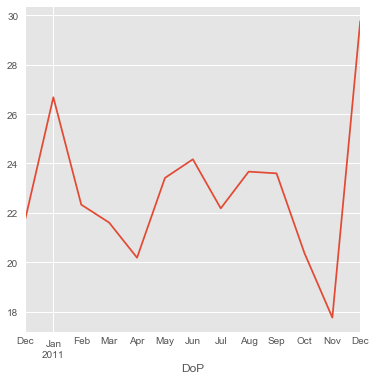

Monthly Sales


In [306]:
Retail_Forecast_Sales_Monthly.plot(figsize=(6,6))
plt.show()
print("Monthly Sales")

In [322]:
RFM_2_Month_View.pivot_table(index='CustomerID', columns='Time_ID', values='RFM_Score', 
                             aggfunc=lambda x: ' '.join(str(v) for v in x))


Time_ID,2010012,2011001
CustomerID,,
12346,None,314 314
12347,214,413
12348,414,411
12356,None,314 314
12359,None,213 213
12370,434,None
12377,414,413
12383,413,213
12386,212,111


In [327]:
new = pd.concat([RFM_201012,RFM_201101,RFM_201102,RFM_201103,RFM_201104,RFM_201105],axis=0)
new1 = new.pivot(index='CustomerID', columns='Time_ID', values='RFM_Score')
new1.head(10)

Time_ID,2010012,2011001,2011002,2011003,2011004,2011005
CustomerID,,,,,,
12346,None,314,None,None,None,None
12347,214,413,None,None,114,None
12348,414,411,None,None,113,None
12350,None,None,112,None,None,None
12352,None,None,312,343,None,None
12353,None,None,None,None,None,311
12354,None,None,None,None,314,None
12355,None,None,None,None,None,113
12356,None,314,None,None,113,None
